In [1]:
import webbrowser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
site1 = "https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb"
site2 = "http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/"
webbrowser.open_new_tab(site1)

True

In [3]:
#Create a dataset

X, y = sklearn.datasets.make_moons(200, noise =0.20)
print X[:5]
print y[:5]

[[-1.14828758  0.38854103]
 [ 1.48629788 -0.49994002]
 [-0.17593495  0.18267377]
 [ 1.06448958 -0.45756065]
 [ 1.2500418   0.52452724]]
[0 1 1 1 0]


In [4]:
X[:,1][:5] #Cool. The [:,1] produces the 2nd column while the [:5] produces the top 5. The "," makes the difference.

array([ 0.38854103, -0.49994002,  0.18267377, -0.45756065,  0.52452724])

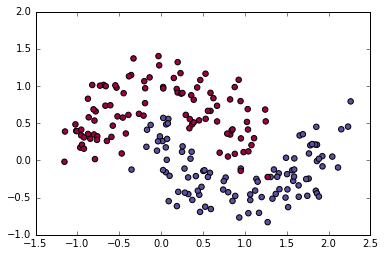

In [5]:
#Plotting the data
plt.scatter(X[:,0], X[:,1], s = 30, c = y, cmap=plt.cm.Spectral) #c=y changes the colors to red and blue

#Notice that below is not linearly seperable. This means that Logistic Regression (unless engineered with polynomials) won't work.
#Cool thing about Neural Networks is that you don't need to worry about feature engineering. Hidden layers do this for you.

In [6]:
#Fit using Logistic Regression

regr = LogisticRegression()
regr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Plotting and seeing results
regr.score(X,y)

0.875

In [8]:
#Function for decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

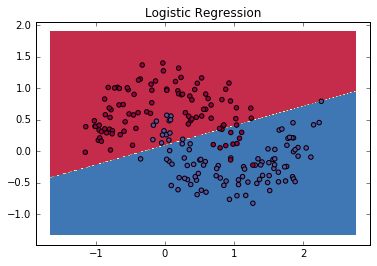

In [9]:
plot_decision_boundary(lambda x: regr.predict(x))
plt.title("Logistic Regression")

In [ ]:
#Train a Neural Network
#Need 2 inputs - (2 features)
#Need 2 ouputs - (0 or 1 classification)

In [16]:
#Define some parameters
num_examples = len(X)
nn_input_dim = 2 #2 dimensions 
nn_output_dim = 2 # Either 0 or 1

In [ ]:
#Gradient Descent parameters
epsilon = 0.01 #learning rate (also alpha)
reg_lamda = 0.01 #Regularization strength

In [22]:
# Create Cross-Entropy loss model

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #Forward propagation
    z1 = np.dot(X,W1) + b1
    a1 = np.tanh(z1) #Hidden layer
    z2 = np.dot(a1,W2) + b2
    
    #Softmax
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    
    #Cross Entropy
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)
    
    #Regularization
    data_loss += reg_lamda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [50]:
mod = {'W1': "some", 'b1': "thing"}

In [51]:
mod["W1"]

'some'

In [54]:
x = np.array([[1],[2],[3]])
y = np.array([[1,2,3]])
y

array([[1, 2, 3]])

In [57]:
np.dot(x,y)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [19]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs

NameError: name 'probs' is not defined